# **Bank marketing campaigns**

## Disusun Oleh: 
###             1. CHRISTIAN TJOPUTERA
###             2. Ahmad Zaid Makarim
###             3. Ronny Sahat Martua Purba

## **Business Problem Understanding**

### **Latar Belakang**

Sebuah bank di Portugal - Eropa sedang melakukan **kampanye pemasaran** untuk mempromosikan produk **deposito berjangka (*term deposit*)** kepada calon nasabah. Mereka menggunakan  **panggilan telepon langsung (*direct telemarketing*)** untuk menjangkau nasabah, dan ingin meningkatkan efektivitas kampanye tersebut.

Ini adalah dataset dari kampanye pemasaran bank, biasanya digunakan untuk klasifikasi apakah seorang nasabah akan berlangganan deposito berjangka (y: yes/no).

### **Permasalahan Utama**

Telemarketing adalah metode yang memakan banyak biaya dan waktu, apalagi jika banyak panggilan tidak menghasilkan konversi. Maka, pertanyaan bisnisnya adalah:

**"Bagaimana cara mengidentifikasi nasabah yang berpotensi tertarik untuk berlangganan deposito berjangka sebelum melakukan panggilan telemarketing?"**

### **Tujuan Bisnis**

1. **Meningkatkan efisiensi** kampanye pemasaran telepon.

2. **Mengurangi biaya operasional** dengan meminimalkan panggilan ke nasabah yang kemungkinan besar akan menolak.

3. **Meningkatkan rasio konversi** dari kampanye menjadi pelanggan deposito.

### **Keluaran yang Diinginkan**

Model atau analisis yang dapat:

1. Memprediksi apakah seorang nasabah akan berkata "yes" terhadap penawaran deposito.

2. Memberikan analisa karakteristik nasabah yang lebih cenede 

3. Memberikan rekomendasi segmentasi pelanggan yang lebih berpeluang dikonversi.

### **Nilai Bisnis**

1. **Penghematan biaya marketing**, karena panggilan hanya difokuskan pada target yang potensial.

2. **Efisiensi waktu dan tenaga kerja** dari agen telemarketing.

3. **Peningkatan pendapatan** dari jumlah deposito berjangka yang lebih tinggi.

### **Peran Data Science**
Peran Data Science
Data science dapat membantu dengan:

1. **EDA (*Exploratory Data Analysis*)** untuk memahami karakteristik nasabah yang berkata “yes”.

2. **Model prediksi (*machine learning*)** untuk memfilter target kampanye.

3. ***Insight* visualisasi** untuk mendukung strategi pemasaran berbasis data.

## **Data Understanding**

### **Sumber Data**
Dataset source: https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset/code



In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

In [112]:
color_job = 'lightblue'
color_month = 'lightgreen'
color_education = '#D2B48C'
color_day_of_week = '#FFA07A'
color_marital= '#FFB347'
color_default = 'lightpink'

In [2]:
file_path = "../data/bank-additional-full.csv"
df = pd.read_csv(file_path, sep=';') 

In [10]:
df_shape = df.shape
df_dtypes = df.dtypes
df_head = df.head()

In [7]:
df_shape

(41188, 21)

In [11]:
df_dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [12]:
df_head

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## **Pemahaman Data**

### **1. Atribut Information**

| Attribute | Data Type | Description |
| --- | --- | --- |
| age | Numerik | Usia klien |
| job | Kategorikal | Jenis Pekerjaan Klien |
| marital | Kategorikal | Status Pernikahan Klien |
| education | Kategorikal | Tingkat pendidikan klien |
| default | Kategorikal | Status kredit klien |
| hosuing | Kategorikal | Status apakah klien memiliki pinjamanan perumahan |
| loan | Kategorikal | Status apakah klien memiliki pinjaman pribadi |
| contact | Kategorikal | Jenis komunikasi kontak terakhir |
| month | Kategorikal | Bulan kontah terakhir dengan klien dalam tahun ini |
| day_of_week | Kategorikal | hari dalam seminggu kontak terakhir dengan klien |
| duration | Numerikal | Durasi kontak terakhir dengan klien dalam detik |
| campaign | Numerikal | Jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini |
| pdays | Numerikal | Jumlah hari sejak klien terakhir kali dihubungi dari kampanye sebelumnya |
| previous | Numerikal | Jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini |
| poutcome | Kategorikal | Hasil dari kampanye pemasaran sebelumnya  |
| emp.var.rate | Numerikal | Tingkat variasi pekerjaan |
| cons.price.idx  | Numerikal | Indeks harga konsumen |
| cons.conf.idx  | Numerikal | Indeks kepercayaan konsumen |
| euribor3m | Numerikal | Tingkat euribor 3 bulan |
| nr.employed | Numerikal | Jumlah karyawan |
| y | Kategorikal | Status apakah klien telah berlangganan deposito berjangka? |

### **2. Kategori Fitur**

In [52]:
categorical_summary = df.select_dtypes(include='object').nunique().sort_values(ascending=False)

# Konversi ke DataFrame
category_table = pd.DataFrame({
    'Kolom': categorical_summary.index,
    'Jumlah Kategori Unik': categorical_summary.values
})

# Format kolom angka agar rata kanan secara visual
category_table['Jumlah Kategori Unik'] = category_table['Jumlah Kategori Unik'].apply(lambda x: f"{x:>5}")

# Tampilkan sebagai tabel markdown tanpa index
print(tabulate(category_table, headers='keys', tablefmt='github', showindex=False))

| Kolom       |   Jumlah Kategori Unik |
|-------------|------------------------|
| job         |                     12 |
| month       |                     10 |
| education   |                      8 |
| day_of_week |                      5 |
| marital     |                      4 |
| default     |                      3 |
| housing     |                      3 |
| loan        |                      3 |
| poutcome    |                      3 |
| contact     |                      2 |
| y           |                      2 |


| Kolom       |   Jumlah Kategori Unik |
|-------------|------------------------|
| job         |                     12 |
| month       |                     10 |
| education   |                      8 |
| day_of_week |                      5 |
| marital     |                      4 |
| default     |                      3 |
| housing     |                      3 |
| loan        |                      3 |
| poutcome    |                      3 |
| contact     |                      2 |
| y           |                      2 |

#### **2.1. Kategori Fitur: `job`**

In [34]:
# Menghitung jumlah masing-masing kategori pada kolom 'job'
job_counts = df['job'].value_counts().reset_index()

# Ubah nama kolom agar lebih informatif
job_counts.columns = ['Job', 'Total']

# Tampilkan tabel
print(tabulate(job_counts, headers='keys', tablefmt='github', showindex=False))

| Job           |   Total |
|---------------|---------|
| admin.        |   10422 |
| blue-collar   |    9254 |
| technician    |    6743 |
| services      |    3969 |
| management    |    2924 |
| retired       |    1720 |
| entrepreneur  |    1456 |
| self-employed |    1421 |
| housemaid     |    1060 |
| unemployed    |    1014 |
| student       |     875 |
| unknown       |     330 |


| Job           |   Total |
|---------------|---------|
| admin.        |   10422 |
| blue-collar   |    9254 |
| technician    |    6743 |
| services      |    3969 |
| management    |    2924 |
| retired       |    1720 |
| entrepreneur  |    1456 |
| self-employed |    1421 |
| housemaid     |    1060 |
| unemployed    |    1014 |
| student       |     875 |
| unknown       |     330 |

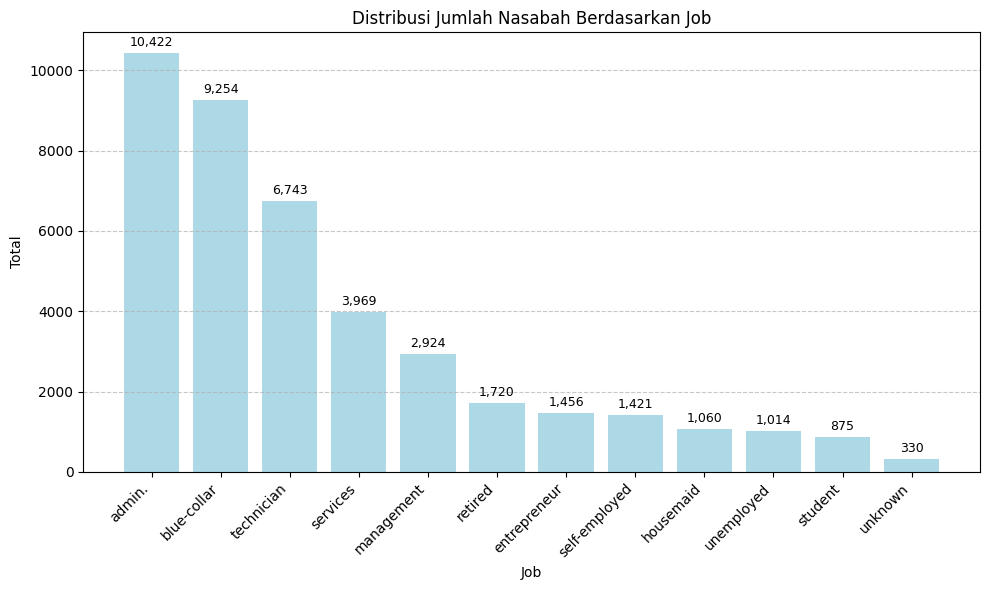

In [84]:
plt.figure(figsize=(10, 6))
bars = plt.bar(job_counts['Job'], job_counts['Total'], color=color_job)
plt.ylabel('Total')
plt.xlabel('Job')
plt.title('Distribusi Jumlah Nasabah Berdasarkan Job')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan angka di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100,
             f'{height:,}', ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')  # Jika nama Job panjang
plt.tight_layout()
plt.show()

#### **2.2. Kategori Fitur: `month`**

In [32]:
# Hitung jumlah masing-masing bulan
month_counts = df['month'].value_counts().reset_index()
month_counts.columns = ['Month', 'Total']

# Buat urutan bulan yang benar
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Filter hanya bulan yang ada di data, lalu urutkan sesuai urutan kalender
month_counts = month_counts[month_counts['Month'].isin(month_order)]
month_counts['Month'] = pd.Categorical(month_counts['Month'], categories=month_order, ordered=True)
month_counts = month_counts.sort_values('Month')

# Tampilkan tabel
print(tabulate(month_counts, headers='keys', tablefmt='github', showindex=False))

| Month   |   Total |
|---------|---------|
| mar     |     546 |
| apr     |    2632 |
| may     |   13769 |
| jun     |    5318 |
| jul     |    7174 |
| aug     |    6178 |
| sep     |     570 |
| oct     |     718 |
| nov     |    4101 |
| dec     |     182 |


| Month   |   Total |
|---------|---------|
| mar     |     546 |
| apr     |    2632 |
| may     |   13769 |
| jun     |    5318 |
| jul     |    7174 |
| aug     |    6178 |
| sep     |     570 |
| oct     |     718 |
| nov     |    4101 |
| dec     |     182 |

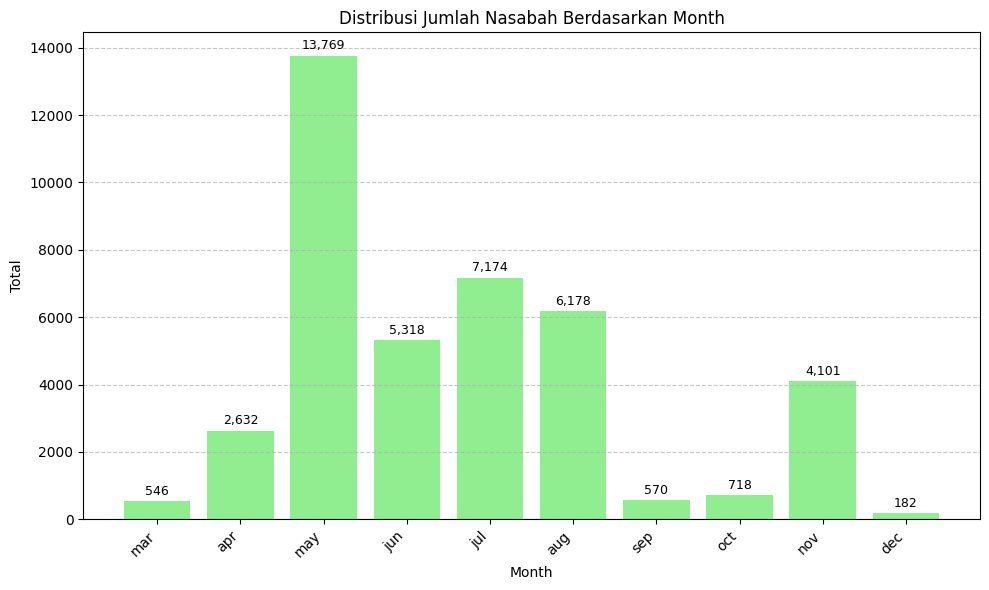

In [85]:
plt.figure(figsize=(10, 6))
bars = plt.bar(month_counts['Month'], month_counts['Total'], color=color_month)
plt.ylabel('Total')
plt.xlabel('Month')
plt.title('Distribusi Jumlah Nasabah Berdasarkan Month')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan angka di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100,
             f'{height:,}', ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')  # Jika nama Job panjang
plt.tight_layout()
plt.show()

#### **2.3. Kategori Fitur: `education`**

In [35]:
# Menghitung jumlah masing-masing kategori pada kolom 'education'
education_counts = df['education'].value_counts().reset_index()

# Ubah nama kolom agar lebih informatif
education_counts.columns = ['Education', 'Total']

# Tampilkan tabel
print(education_counts)

| Education           |   Total |
|---------------------|---------|
| university.degree   |   12168 |
| high.school         |    9515 |
| basic.9y            |    6045 |
| professional.course |    5243 |
| basic.4y            |    4176 |
| basic.6y            |    2292 |
| unknown             |    1731 |
| illiterate          |      18 |


| Education           |   Total |
|---------------------|---------|
| university.degree   |   12168 |
| high.school         |    9515 |
| basic.9y            |    6045 |
| professional.course |    5243 |
| basic.4y            |    4176 |
| basic.6y            |    2292 |
| unknown             |    1731 |
| illiterate          |      18 |

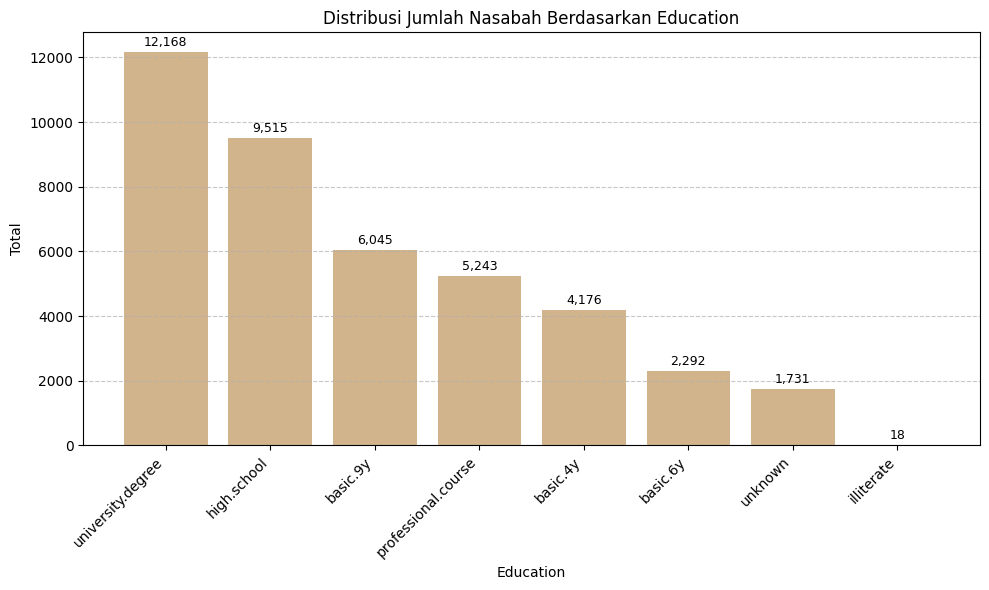

In [88]:
plt.figure(figsize=(10, 6))
bars = plt.bar(education_counts['Education'], education_counts['Total'], color=color_education)
plt.ylabel('Total')
plt.xlabel('Education')
plt.title('Distribusi Jumlah Nasabah Berdasarkan Education')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan angka di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100,
             f'{height:,}', ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')  # Jika nama Job panjang
plt.tight_layout()
plt.show()

In [ ]:
# Hitung jumlah masing-masing hari
day_of_week_counts = df['day_of_week'].value_counts().reset_index()
day_of_week_counts.columns = ['Day Of Week', 'Total']

# Buat urutan hari kerja
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']

# Ubah ke kategori bertipe urutan dan urutkan
day_of_week_counts['Day Of Week'] = pd.Categorical(day_of_week_counts['Day Of Week'], categories=day_order, ordered=True)
day_of_week_counts = day_of_week_counts.sort_values('Day Of Week')

# Tampilkan tabel
print(tabulate(day_of_week_counts, headers='keys', tablefmt='github', showindex=False))

#### **2.4. Kategori Fitur: `day_of_week`**

In [50]:
# Hitung jumlah masing-masing hari
day_of_week_counts = df['day_of_week'].value_counts().reset_index()
day_of_week_counts.columns = ['Day Of Week', 'Total']

# Buat urutan hari kerja
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']

# Ubah ke kategori bertipe urutan dan urutkan
day_of_week_counts['Day Of Week'] = pd.Categorical(day_of_week_counts['Day Of Week'], categories=day_order, ordered=True)
day_of_week_counts = day_of_week_counts.sort_values('Day Of Week')

# Tampilkan tabel
print(tabulate(day_of_week_counts, headers='keys', tablefmt='github', showindex=False))

| Day Of Week   |   Total |
|---------------|---------|
| mon           |    8514 |
| tue           |    8090 |
| wed           |    8134 |
| thu           |    8623 |
| fri           |    7827 |


| Day Of Week   |   Total |
|---------------|---------|
| mon           |    8514 |
| tue           |    8090 |
| wed           |    8134 |
| thu           |    8623 |
| fri           |    7827 |

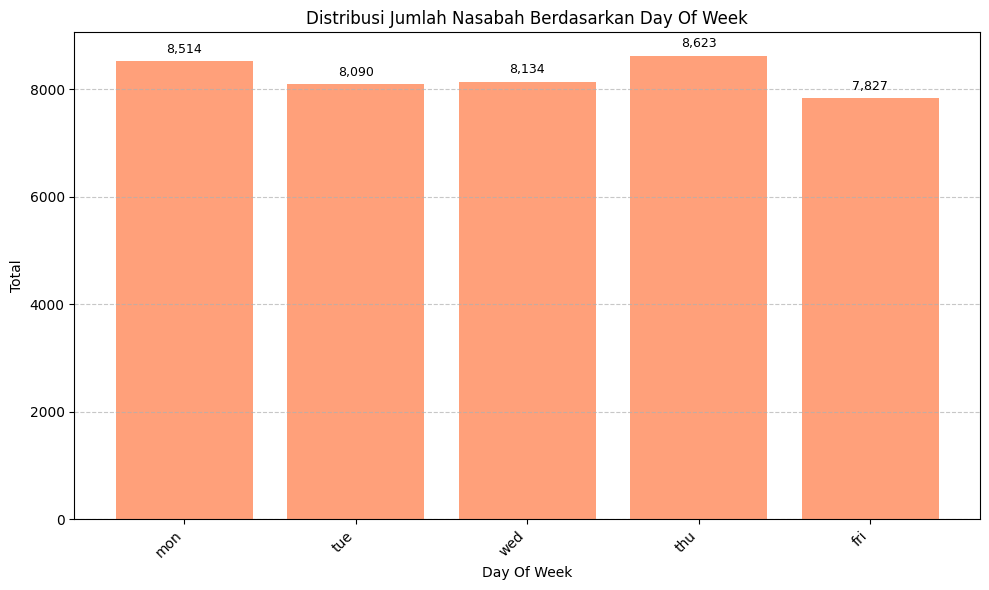

In [98]:
plt.figure(figsize=(10, 6))
bars = plt.bar(day_of_week_counts['Day Of Week'], day_of_week_counts['Total'], color=color_day_of_week)
plt.ylabel('Total')
plt.xlabel('Day Of Week')
plt.title('Distribusi Jumlah Nasabah Berdasarkan Day Of Week')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan angka di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100,
             f'{height:,}', ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')  # Jika nama Job panjang
plt.tight_layout()
plt.show()

#### **2.5. Kategori Fitur: `marital`**

In [38]:
# Menghitung jumlah masing-masing kategori pada kolom 'marital'
marital_counts = df['marital'].value_counts().reset_index()

# Ubah nama kolom agar lebih informatif
marital_counts.columns = ['Marital', 'Total']

# Tampilkan tabel
print(tabulate(marital_counts, headers='keys', tablefmt='github', showindex=False))

| Marital   |   Total |
|-----------|---------|
| married   |   24928 |
| single    |   11568 |
| divorced  |    4612 |
| unknown   |      80 |


| Marital   |   Total |
|-----------|---------|
| married   |   24928 |
| single    |   11568 |
| divorced  |    4612 |
| unknown   |      80 |

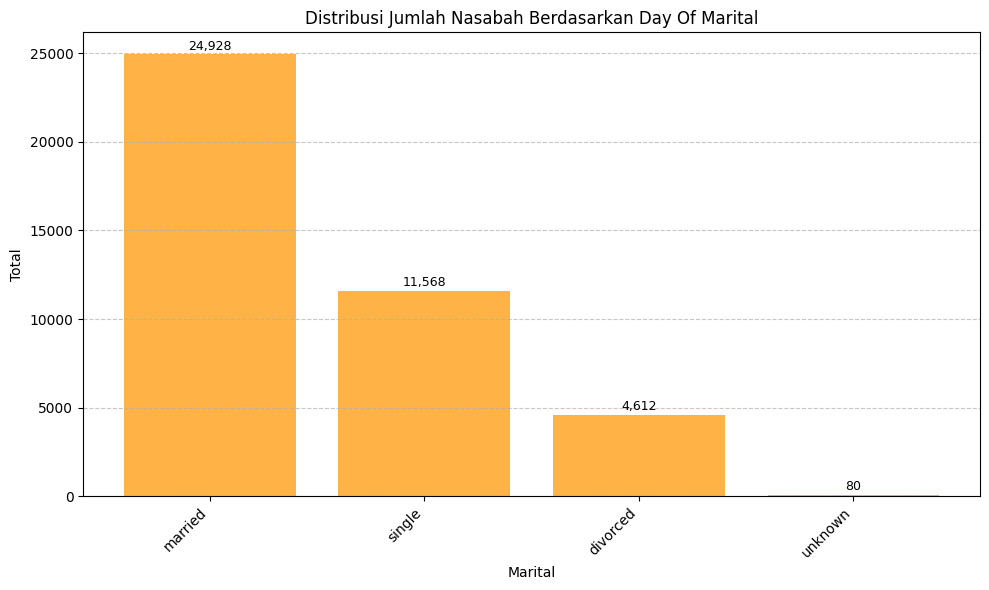

In [103]:
plt.figure(figsize=(10, 6))
bars = plt.bar(marital_counts['Marital'], marital_counts['Total'], color=color_marital)
plt.ylabel('Total')
plt.xlabel('Marital')
plt.title('Distribusi Jumlah Nasabah Berdasarkan Day Of Marital')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan angka di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100,
             f'{height:,}', ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')  # Jika nama Job panjang
plt.tight_layout()
plt.show()

#### **2.6. Kategori Fitur: `default`**

In [39]:
# Menghitung jumlah masing-masing kategori pada kolom 'default'
default_counts = df['default'].value_counts().reset_index()

# Ubah nama kolom agar lebih informatif
default_counts.columns = ['Default', 'Total']

# Tampilkan tabel
print(tabulate(default_counts, headers='keys', tablefmt='github', showindex=False))

| Default   |   Total |
|-----------|---------|
| no        |   32588 |
| unknown   |    8597 |
| yes       |       3 |


| Default   |   Total |
|-----------|---------|
| no        |   32588 |
| unknown   |    8597 |
| yes       |       3 |

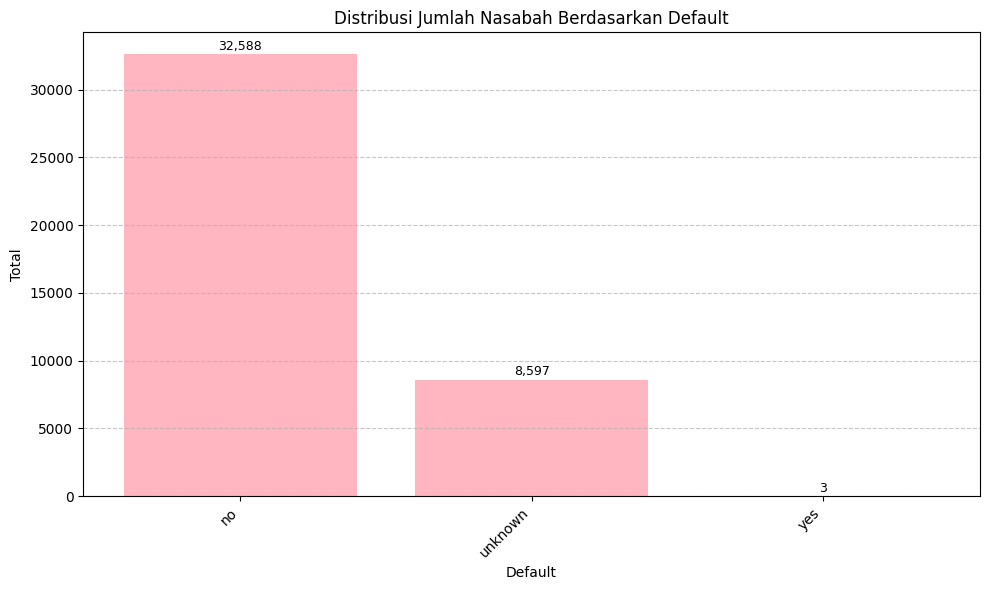

In [113]:
plt.figure(figsize=(10, 6))
bars = plt.bar(default_counts['Default'], default_counts['Total'], color=color_default)
plt.ylabel('Total')
plt.xlabel('Default')
plt.title('Distribusi Jumlah Nasabah Berdasarkan Default')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan angka di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100,
             f'{height:,}', ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')  # Jika nama Job panjang
plt.tight_layout()
plt.show()

#### **2.7. Kategori Fitur: `housing`**

In [115]:
# Menghitung jumlah masing-masing kategori pada kolom 'housing'
housing_counts = df['housing'].value_counts().reset_index()

# Ubah nama kolom agar lebih informatif
housing_counts.columns = ['Housing', 'Total']

# Tampilkan tabel
print(tabulate(housing_counts, headers='keys', tablefmt='github', showindex=False))

| Housing   |   Total |
|-----------|---------|
| yes       |   21576 |
| no        |   18622 |
| unknown   |     990 |


| Housing   |   Total |
|-----------|---------|
| yes       |   21576 |
| no        |   18622 |
| unknown   |     990 |

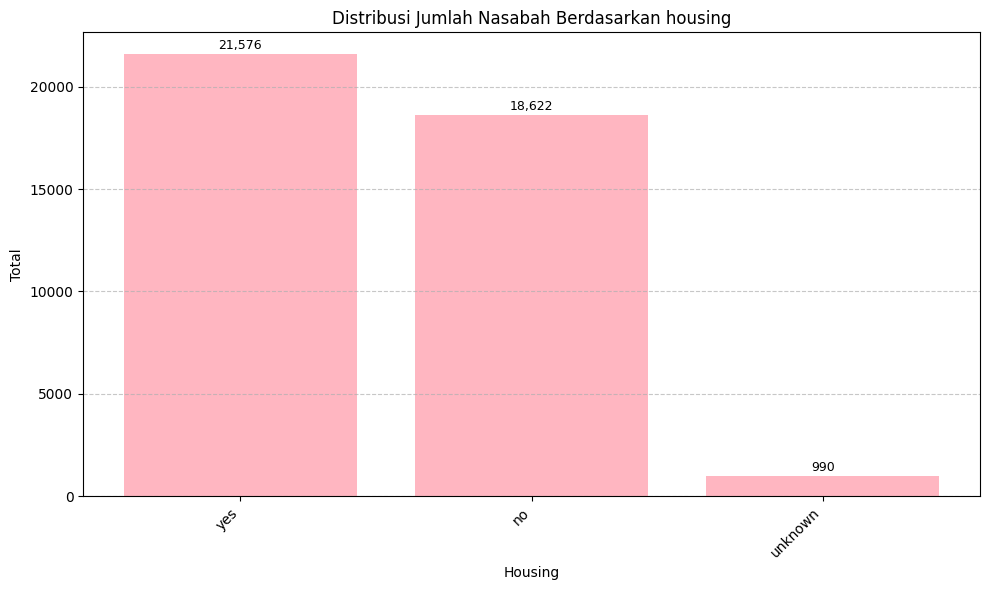

In [117]:
plt.figure(figsize=(10, 6))
bars = plt.bar(housing_counts['Housing'], housing_counts['Total'], color=color_default)
plt.ylabel('Total')
plt.xlabel('Housing')
plt.title('Distribusi Jumlah Nasabah Berdasarkan housing')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan angka di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100,
             f'{height:,}', ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')  # Jika nama Job panjang
plt.tight_layout()
plt.show()

#### **2.8. Kategori Fitur: `loan`**

In [41]:
# Menghitung jumlah masing-masing kategori pada kolom 'loan'
loan_counts = df['loan'].value_counts().reset_index()

# Ubah nama kolom agar lebih informatif
loan_counts.columns = ['Loan', 'Total']

# Tampilkan tabel
print(tabulate(loan_counts, headers='keys', tablefmt='github', showindex=False))

| Loan    |   Total |
|---------|---------|
| no      |   33950 |
| yes     |    6248 |
| unknown |     990 |


| Loan    |   Total |
|---------|---------|
| no      |   33950 |
| yes     |    6248 |
| unknown |     990 |

#### **2.9. Kategori Fitur: `poutcome`**

In [42]:
# Menghitung jumlah masing-masing kategori pada kolom 'poutcome'
poutcome_counts = df['poutcome'].value_counts().reset_index()

# Ubah nama kolom agar lebih informatif
poutcome_counts.columns = ['Poutcome', 'Total']

# Tampilkan tabel
print(tabulate(poutcome_counts, headers='keys', tablefmt='github', showindex=False))

| Poutcome    |   Total |
|-------------|---------|
| nonexistent |   35563 |
| failure     |    4252 |
| success     |    1373 |


| Poutcome    |   Total |
|-------------|---------|
| nonexistent |   35563 |
| failure     |    4252 |
| success     |    1373 |

#### **2.10. Kategori Fitur: `contact`**

In [43]:
# Menghitung jumlah masing-masing kategori pada kolom 'contact'
contact_counts = df['contact'].value_counts().reset_index()

# Ubah nama kolom agar lebih informatif
contact_counts.columns = ['Contact', 'Total']

# Tampilkan tabel
print(tabulate(contact_counts, headers='keys', tablefmt='github', showindex=False))

| Contact   |   Total |
|-----------|---------|
| cellular  |   26144 |
| telephone |   15044 |


| Contact   |   Total |
|-----------|---------|
| cellular  |   26144 |
| telephone |   15044 |

#### **2.11. Kategori Fitur: `y`**

In [114]:
# Menghitung jumlah masing-masing kategori pada kolom 'y'
y_counts = df['y'].value_counts().reset_index()

# Ubah nama kolom agar lebih informatif
y_counts.columns = ['YES/NO', 'Total']

# Tampilkan tabel
print(tabulate(y_counts, headers='keys', tablefmt='github', showindex=False))

| YES/NO   |   Total |
|----------|---------|
| no       |   36548 |
| yes      |    4640 |


| YES/NO   |   Total |
|----------|---------|
| no       |   36548 |
| yes      |    4640 |

### **3. Duplikat Data**

In [9]:
duplicate_rows = df.duplicated().sum()

duplicate_rows

12

### **Missing Value**

In [4]:
missing_values = df.isnull().sum()
missing_values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

| Kolom         | Jumlah Kategori Unik |
| ------------- | -------------------- |
| job           | 12                   |
| month         | 10                   |
| education     | 8                    |
| day\_of\_week | 5                    |
| marital       | 4                    |
| default       | 3                    |
| housing       | 3                    |
| loan          | 3                    |
| poutcome      | 3                    |
| contact       | 2                    |
| y (target)    | 2 (`yes`, `no`)      |
